In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("housing.csv")

In [3]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,House Price
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   House Price         20640 non-null  int64  
dtypes: float64(4), int64(5)
memory usage: 1.4 MB


In [5]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,House Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
House Price             0
dtype: int64

In [7]:
bedroom_mean=int(df['total_bedrooms'].mean())

In [8]:
df_mean=df.fillna({'total_bedrooms':bedroom_mean})

In [9]:
df_mean.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
House Price           0
dtype: int64

In [10]:
df_dup_removed=df_mean.drop_duplicates(keep=False)

In [11]:
df_dup_removed

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,House Price
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700


<AxesSubplot:>

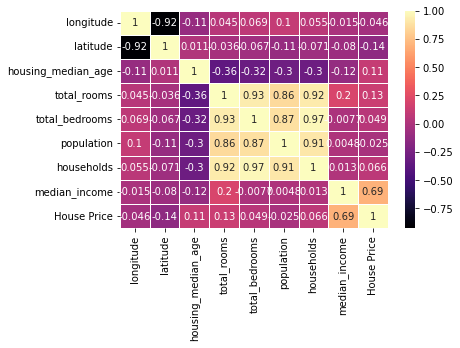

In [12]:
df_corr=df_dup_removed.corr()
sns.heatmap(df_corr,cmap='magma',annot=True,linewidths=1,linecolor='white')

In [13]:
df_r=df_dup_removed.drop(['households','latitude','population','total_bedrooms'],axis=1)

<AxesSubplot:>

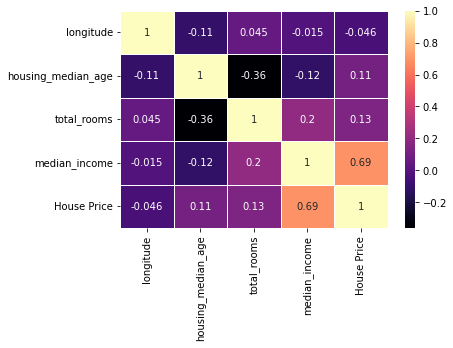

In [14]:
df_corr=df_r.corr()
sns.heatmap(df_corr,cmap='magma',annot=True,linewidths=1,linecolor='white')

<AxesSubplot:>

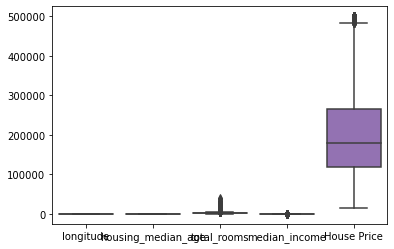

In [15]:
sns.boxplot(data=df_r)


In [16]:
def outlier(df_in,column_name):
    q1=df_in[column_name].quantile(0.25)
    q3=df_in[column_name].quantile(0.75)
    IQR=q3-q1
    lower=q1-1.5*IQR
    higher=q3+1.5*IQR
    df_out=df_in.loc[(df_in[column_name]>lower) &  (df_in[column_name]<higher)]
    return df_out

In [17]:
df=outlier(df_r,"total_rooms")

In [18]:
df.describe()

,longitude,housing_median_age,total_rooms,median_income,House Price
count,19353.000000,19353.000000,19353.000000,19353.000000,19353.000000
mean,-119.591048,29.522193,2225.118793,3.812732,204961.348835
std,2.000904,12.308489,1153.906566,1.883560,115283.433436
min,-124.350000,1.000000,2.000000,0.499900,14999.000000
25%,-121.810000,19.000000,1406.000000,2.527500,117600.000000
50%,-118.500000,30.000000,2036.000000,3.481200,177700.000000
75%,-118.030000,38.000000,2892.000000,4.668700,262200.000000
max,-114.310000,52.000000,5694.000000,15.000100,500001.000000


<AxesSubplot:>

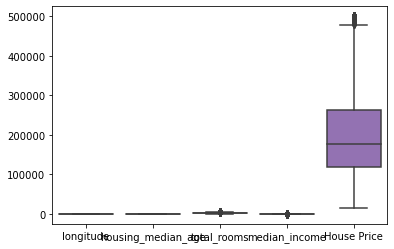

In [19]:
sns.boxplot(data=df)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19353 entries, 0 to 20639
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           19353 non-null  float64
 1   housing_median_age  19353 non-null  int64  
 2   total_rooms         19353 non-null  int64  
 3   median_income       19353 non-null  float64
 4   House Price         19353 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 907.2 KB


In [21]:
y_actutal=df['House Price']

df=(df-df.min() )/(df.max()-df.min())
df

,longitude,housing_median_age,total_rooms,median_income,House Price
0,0.211155,0.784314,0.154252,0.539668,0.902266
2,0.210159,1.000000,0.257379,0.466028,0.695051
3,0.209163,1.000000,0.223472,0.354699,0.672783
4,0.209163,1.000000,0.285488,0.230776,0.674638
5,0.209163,1.000000,0.161103,0.243921,0.525155
...,...,...,...,...,...
20635,0.324701,0.470588,0.292164,0.073130,0.130105
20636,0.312749,0.333333,0.122101,0.141853,0.128043
20637,0.311753,0.313725,0.395643,0.082764,0.159383
20638,0.301793,0.333333,0.326423,0.094295,0.143713


In [22]:
y_actutal

0        452600
2        352100
3        341300
4        342200
5        269700
          ...  
20635     78100
20636     77100
20637     92300
20638     84700
20639     89400
Name: House Price, Length: 19353, dtype: int64

In [23]:
X=df.drop("House Price",axis=1)

In [24]:
X

,longitude,housing_median_age,total_rooms,median_income
0,0.211155,0.784314,0.154252,0.539668
2,0.210159,1.000000,0.257379,0.466028
3,0.209163,1.000000,0.223472,0.354699
4,0.209163,1.000000,0.285488,0.230776
5,0.209163,1.000000,0.161103,0.243921
...,...,...,...,...
20635,0.324701,0.470588,0.292164,0.073130
20636,0.312749,0.333333,0.122101,0.141853
20637,0.311753,0.313725,0.395643,0.082764
20638,0.301793,0.333333,0.326423,0.094295


In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y_actutal, test_size=0.3)

In [26]:
x1=X_train['longitude']
x2=X_train['housing_median_age']
x3=X_train['total_rooms']
x4=X_train['median_income']

In [27]:
y=Y_train

n=len(x1)
t1=t0=t2=t3=t4=0
iteration=2000
alpha=0.5
for i in range(iteration):
    y_pre=t4*x4+t3*x3+t2*x2+t1*x1+t0
    cost=1/n*sum([val**2 for val in (y_pre-y)])
    newt4=1/n*sum(x4*(y_pre-y))
    newt3=1/n*sum(x3*(y_pre-y))
    newt2=1/n*sum(x2*(y_pre-y))
    newt1=1/n*sum(x1*(y_pre-y))
    newt0=1/n*sum(y_pre-y)
    t4=t4-alpha*newt4
    t3=t3-alpha*newt3
    t2=t2-alpha*newt2
    t1=t1-alpha*newt1
    t0=t0-alpha*newt0

In [28]:
y_pre=t0+t1*x1+t2*x2+t3*x3+t4*x4
y_pre

20385    279094.240895
11672    254933.509589
6493     155617.229278
7091     269446.965787
15267    247657.133264
             ...      
10449    240629.825638
16289    128492.281572
5893     196962.753964
8192     237022.064669
17403    106066.214562
Length: 13547, dtype: float64

In [29]:
x5=X_test['longitude']
x6=X_test['housing_median_age']
x7=X_test['total_rooms']
x8=X_test['median_income']

In [30]:
y_pre=t0+t1*x5+t2*x6+t3*x7+t4*x8
y_pre

14754    126291.302730
18306    380533.474620
5975     207303.853200
14303    144315.167222
6304     195646.229148
             ...      
17948    255883.723583
15073    287719.929511
17417    121785.708381
8920     139465.549400
13483    197994.096598
Length: 5806, dtype: float64

In [31]:
from sklearn import metrics

In [32]:
metrics.r2_score(Y_test,y_pre)

0.5119302798222709

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='House Price'>

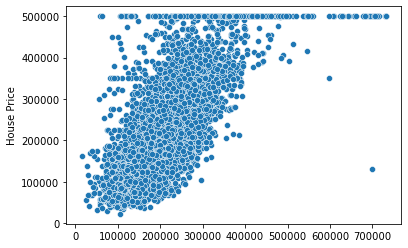

In [33]:
sns.scatterplot(y_pre,Y_test)